In [1]:
#Importing libraries
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt
from operator import itemgetter
from glob import glob


In [2]:
# Reading the image of a plant seedling as grayscale from the outset
image = skimage.io.imread(fname='sudoku-original.png', as_gray=True)

# Displaying the image
fig, ax = plt.subplots()
plt.imshow(image, cmap='gray')
plt.show()

FileNotFoundError: ignored

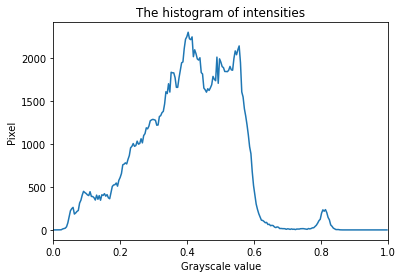

In [ ]:
# Creating histogram
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))

# Drawing the histogram figure
plt.figure()
plt.title("The histogram of intensities")
plt.xlabel("Grayscale value")
plt.ylabel("Pixel")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()


(3, 3)
[[ 1.20421489e+00  1.08019276e-01 -7.09526615e+01]
 [ 4.59967379e-02  1.31299779e+00 -8.90956813e+01]
 [ 1.40435650e-04  5.18251880e-04  1.00000000e+00]]
(350, 350, 3)


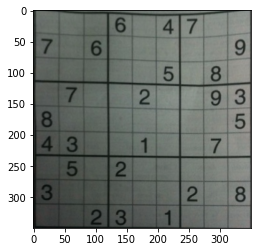

In [ ]:
# SUDOKU - Perspective Transform

img = cv2.imread("sudoku-original.jpg")

# Output size
width = 350
height = 350

# Specify conjugate x,y coordinates (not y,x)
input = np.float32([[53,66], [367,55], [388,388], [26,367]])
output = np.float32([[0,0], [width-1,0], [width-1,height-1], [0,height-20]])

# Compute perspective matrix
matrix = cv2.getPerspectiveTransform(input,output)

print(matrix.shape)
print(matrix)

# Perspective transformation setting area outside input to black
imgOutput = cv2.warpPerspective(img, matrix, (width,height), cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))
print(imgOutput.shape)

# Saving the warped output
cv2.imwrite("sudoku_warped.jpg", imgOutput)
plt.imshow(imgOutput)
plt.show()